# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [47]:
import nltk
# nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [49]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [50]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [51]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [54]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding, sentence_embeddings, sentences

def get_all_embeddings(articles):
  avg_embeddings = []
  all_embeddings = []
  preprocessed_sentences = []
  for i in range(0, len(articles)):
    print(i)
    temp1, temp2, temp3 = get_review_embedding(articles[i])
    avg_embeddings.append(temp1)
    all_embeddings.append(temp2)
    preprocessed_sentences.append(temp3)
  return avg_embeddings, all_embeddings, preprocessed_sentences

In [55]:
avg_embeddings, all_embeddings, preprocessed_sentences = get_all_embeddings(newsgroups_train.data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
import json
out = dict()
new_embeddings = []
for e in range(len(avg_embeddings)):
  avg_embeddings[e] /= len(preprocessed_sentences[e])
  new_embeddings.append(list(avg_embeddings[e]))
out['avg_embeddings'] = new_embeddings
# out['all_embeddings'] = all_embeddings
out['preprocessed_sentences'] = preprocessed_sentences

with open('embeddings-new.json', 'w') as file:
  file.write(json.dumps(out))

NameError: name 'avg_embeddings' is not defined

In [4]:
import json, sys

data = []
with open('embeddings-new.json') as file:
    data = json.loads(file.read())

In [5]:
print(sys.getsizeof(data['avg_embeddings']))

95864


<class 'list'>


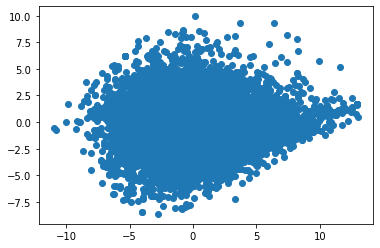

In [6]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = []
print(type(data['avg_embeddings'][0]))
for emb in data['avg_embeddings']:
    if emb != [] and emb != None and emb[0] <= 1 and emb[0] >= -1:
        X.append(emb)

pca = PCA(n_components=2)
x = pca.fit_transform(X)
plot = plt.scatter(x[:, 0], x[:, 1])
plt.show()



# K_Means Algorithm


In [7]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

def runKMeans(k, X):
    kmeans = KMeans(n_clusters=k, random_state=4).fit(X)
    return kmeans

#  ---------------------------------------------------------------------------------------------------

# my implementation of the KMeans algorithm where I used 
# word embeddings for preparing a 768 dimensional representation
# class MyKMeans():
#     # option to use KMeans++ while calling this function

#     def __init__(self, n_cluster, avg_embeddings, algo_type):
#         self.n_cluster = n_cluster
#         self.avg_embeddings = avg_embeddings
#         # self.all_embeddings = all_embeddings
#         self.data_size = len(avg_embeddings)
#         self.dims = len(avg_embeddings[0])
#         self.optimization = False
#         if algo_type == '++':
#             self.optimization = True

#     # select points (random if not KMeans++)\
#     def __initialPointsRand(self):
#         x = np.rand(np.arange(self.data_size), self.n_cluster)
#         return x
    
#     def __findDistance(self, pt1, pt2):
#         dist = 0
#         for i in range(len(self.avg_embeddings[0])):
#             dist += (self.avg_embeddings[pt1][i] - self.avg_embeddings[pt2][i])**2
#         return dist**(0.5)

#     # start fitting the points (findout if there are optimal ways to find these distances)
#     def fit(self, rounds):

#         def __hasChanged(self, prev_clusters):
#             for i in range(len(self.centers)):
#                 point  = self.centers[i]
#                 for cluster in prev_clusters:
#                     if point in cluster:
#                         if self.clusters[i] != cluster:
#                             return True
#             return False
        
#         self.centers = self.__initialPointsRand()
#         self.clusters = [set(i) for i in range(self.n_cluster)]
#         prev_clusters = [set() for i in range(self.n_cluster)]
#         while __hasChanged(prev_clusters):
#             prev_clusters = self.clusters
#             for pt in range(self.n_cluster):
#                 min_dist = 1e150
#                 best_cluster = -1
#                 for i in range(self.dims):
#                     dist = self.__findDistance(pt, self.centers[i])
#                     if min_dist > dist:
#                         min_dist = dist
#                         best_cluster = i

#                 assert(best_cluster > -1 and best_cluster < self.dims)
#                 self.clusters[best_cluster].add(pt)

    # can do above for some number of times so that we get better results

    # won't return anything, just store in the object

In [8]:
#code for visualisation of clusters

plot = plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_)
plt.show()



NameError: name 'kmeans' is not defined

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







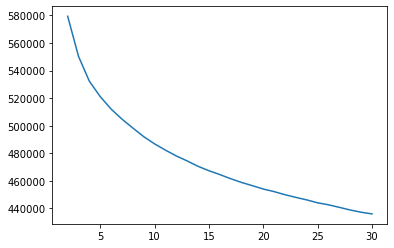

In [9]:
def elbow_method(max, X):
    exp_var = []
    labels = []
    objs = []
    for i in range(2, max+1):
        kmeans = runKMeans(i, X)
        exp_var.append(kmeans.inertia_)
        labels.append(kmeans.labels_)
        objs.append(kmeans)
        # print(labels[-1])
    
    x = [i for i in range(2, max+1)]
    plt.plot(x, exp_var)
    return exp_var, labels, objs

exp_var, labels, objs = elbow_method(30, X)


  


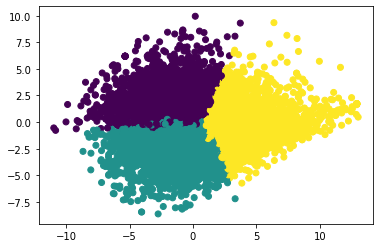

In [10]:
plot = plt.scatter(x[:, 0], x[:, 1], c = labels[1])
plt.show()


# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




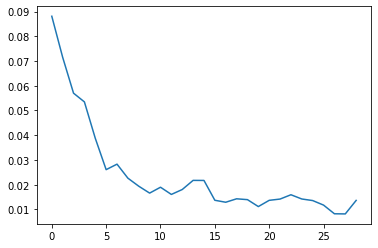

In [11]:
# print(labels[0])
import sklearn.metrics
def silhouette_score(X, labels):
    sil_score = []
    for label in labels:
        # print(label)
        sil_score.append(sklearn.metrics.silhouette_score(X, label))
    plt.plot(sil_score)

silhouette_score(X, labels)

# print(len(labels), len(labels[0]))

  



# Agglomerative clustering

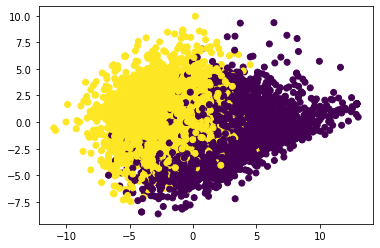

In [12]:
from sklearn.cluster import AgglomerativeClustering
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

def agglomerativeClustering(X):
  clustering = AgglomerativeClustering().fit(X)
  return clustering.labels_

agg_labels = agglomerativeClustering(X)
plot = plt.scatter(x[:, 0], x[:, 1], c = agg_labels)
plt.show()


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



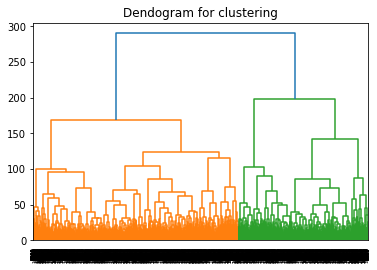

In [13]:
# code to write dendogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as model

plt.title("Dendogram for clustering")
Denndogram = model.dendrogram((model.linkage(X, method='ward')))

The optimal cluster looks to be 2.

## **Explanation**

### Agglomerative Clustering
Agglomerative clustering involves assuming all points to be a cluster with one point each and then start merging two clusters that are closest to each other

### Divisive Clustering
This method starts out by assuming all points to be part of single cluster and then starts dividing the clusters into two parts based on the farthest point and remove it to be a new cluster of it own

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


